In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt


In [4]:
csv_reader = pd.read_csv(r"C:\Users\natar\Downloads\Minimum Wage Data.csv",encoding="latin1")
df=pd.DataFrame(csv_reader)
df.head()



,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,...,0.00000,0.00,0.00000,0.00,NaN
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.8,2.1,2.10000,15.61,2.10000,15.61,NaN
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8,1.65(b),1.65000,12.26,1.65000,12.26,(b)


In [5]:
df.tail()

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
2857,2020,Virginia,7.25,7.25,7.25,7.25,7.25,7.25,258.66,7.25[c],7.25,7.25,7.25,7.25,[c]
2858,2020,Washington,13.50,13.50,7.25,7.25,13.50,13.50,258.66,13.5,13.50,13.50,13.50,13.50,NaN
2859,2020,West Virginia,8.75,8.75,7.25,7.25,8.75,8.75,258.66,8.75,8.75,8.75,8.75,8.75,NaN
2860,2020,Wisconsin,7.25,7.25,7.25,7.25,7.25,7.25,258.66,7.25,7.25,7.25,7.25,7.25,NaN
2861,2020,Wyoming,5.15,5.15,7.25,7.25,7.25,7.25,258.66,5.15,5.15,5.15,5.15,5.15,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


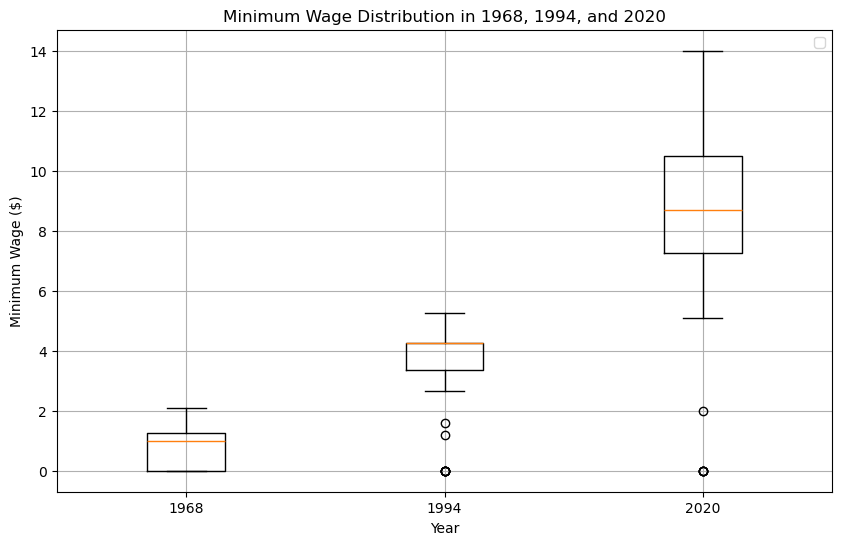

In [6]:
# Extract data for 1968, 1994, and 2020
minimum_wage_1968 = df[df['Year'] == 1968]['State.Minimum.Wage']
minimum_wage_1994 = df[df['Year'] == 1994]['State.Minimum.Wage']
minimum_wage_2020 = df[df['Year'] == 2020]['State.Minimum.Wage']

# Create box plots
plt.figure(figsize=(10, 6))

# Plot box plots for 1968, 1994, and 2020
plt.boxplot([minimum_wage_1968, minimum_wage_1994, minimum_wage_2020], positions=[1, 2, 3], labels=['1968', '1994', '2020'])

# Set x-axis limits
plt.xlim(0.5, 3.5)

plt.xlabel('Year')
plt.ylabel('Minimum Wage ($)')
plt.title('Minimum Wage Distribution in 1968, 1994, and 2020')
plt.grid(True)
plt.legend()
plt.show()

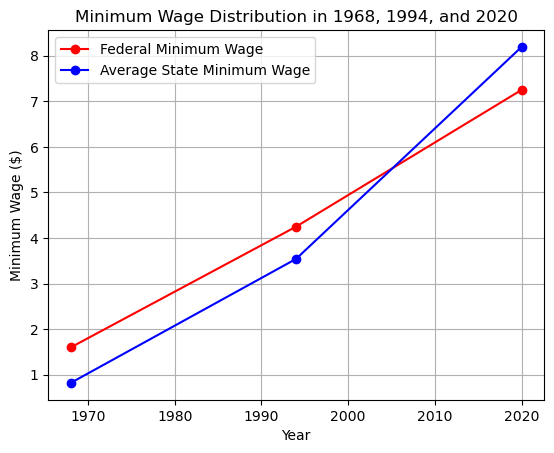

In [7]:
# Extract data for 1968, 1994, and 2020
minimum_wage_1968 = df[df['Year'] == 1968]['State.Minimum.Wage']
minimum_wage_1994 = df[df['Year'] == 1994]['State.Minimum.Wage']
minimum_wage_2020 = df[df['Year'] == 2020]['State.Minimum.Wage']

# Calculate average state minimum wage for 1968, 1994, and 2020
average_state_minimum_wage = [minimum_wage_1968.mean(), minimum_wage_1994.mean(), minimum_wage_2020.mean()]

# Federal minimum wage data
federal_minimum_wage_years = [1968, 1994, 2020]
federal_minimum_wages = [1.6, 4.25, 7.25]  # Example federal minimum wage values for the corresponding years

# Create line plot for federal minimum wage
plt.plot(federal_minimum_wage_years, federal_minimum_wages, marker='o', color='r', label='Federal Minimum Wage')

# Create line plot for average state minimum wage
plt.plot(federal_minimum_wage_years, average_state_minimum_wage, marker='o', color='b', label='Average State Minimum Wage')

plt.xlabel('Year')
plt.ylabel('Minimum Wage ($)')
plt.title('Minimum Wage Distribution in 1968, 1994, and 2020')
plt.grid(True)
plt.legend()
plt.show()

In [17]:
stats.f_oneway(minimum_wage_1968, minimum_wage_1994, minimum_wage_2020)

F_onewayResult(statistic=150.29286077200103, pvalue=2.2538885929846223e-37)

In [8]:
df_1994=df[df["Year"]==1994]
df_1994

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
1404,1994,Alabama,0.00,0.00,4.25,7.42,4.25,7.42,148.2,...,0.00,0.00,0.00,0.00,NaN
1405,1994,Alaska,4.75,8.29,4.25,7.42,4.75,8.29,148.2,4.75,4.75,8.29,4.75,8.29,NaN
1406,1994,Arizona,0.00,0.00,4.25,7.42,4.25,7.42,148.2,...,0.00,0.00,0.00,0.00,NaN
1407,1994,Arkansas,4.25,7.42,4.25,7.42,4.25,7.42,148.2,4.25,4.25,7.42,4.25,7.42,NaN
1408,1994,California,4.25,7.42,4.25,7.42,4.25,7.42,148.2,4.25,4.25,7.42,4.25,7.42,NaN
1409,1994,Colorado,3.00,5.24,4.25,7.42,4.25,7.42,148.2,3,3.00,5.24,3.00,5.24,NaN
1410,1994,Connecticut,4.27,7.45,4.25,7.42,4.27,7.45,148.2,4.27,4.27,7.45,4.27,7.45,NaN
1411,1994,Delaware,4.25,7.42,4.25,7.42,4.25,7.42,148.2,4.25,4.25,7.42,4.25,7.42,NaN
1412,1994,District of Columbia,4.25,7.42,4.25,7.42,4.25,7.42,148.2,4.25,4.25,7.42,4.25,7.42,NaN
1413,1994,Florida,0.00,0.00,4.25,7.42,4.25,7.42,148.2,...,0.00,0.00,0.00,0.00,NaN


In [9]:
df_2020 = df[df['Year'] == 2020]
df_2020.head()

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
2808,2020,Alabama,0.00,0.00,7.25,7.25,7.25,7.25,258.66,...,0.00,0.00,0.00,0.00,NaN
2809,2020,Alaska,10.19,10.19,7.25,7.25,10.19,10.19,258.66,10.19,10.19,10.19,10.19,10.19,NaN
2810,2020,Arizona,12.00,12.00,7.25,7.25,12.00,12.00,258.66,12,12.00,12.00,12.00,12.00,NaN
2811,2020,Arkansas,10.00,10.00,7.25,7.25,10.00,10.00,258.66,10,10.00,10.00,10.00,10.00,NaN
2812,2020,California,13.00,13.00,7.25,7.25,13.00,13.00,258.66,13,13.00,13.00,13.00,13.00,NaN


In [10]:
df_2020['Difference_2020'] = df_2020['State.Minimum.Wage'] - df_2020['Federal.Minimum.Wage']

In [11]:
negative_diff_df = df_2020[df_2020['Difference_2020'] < 0]

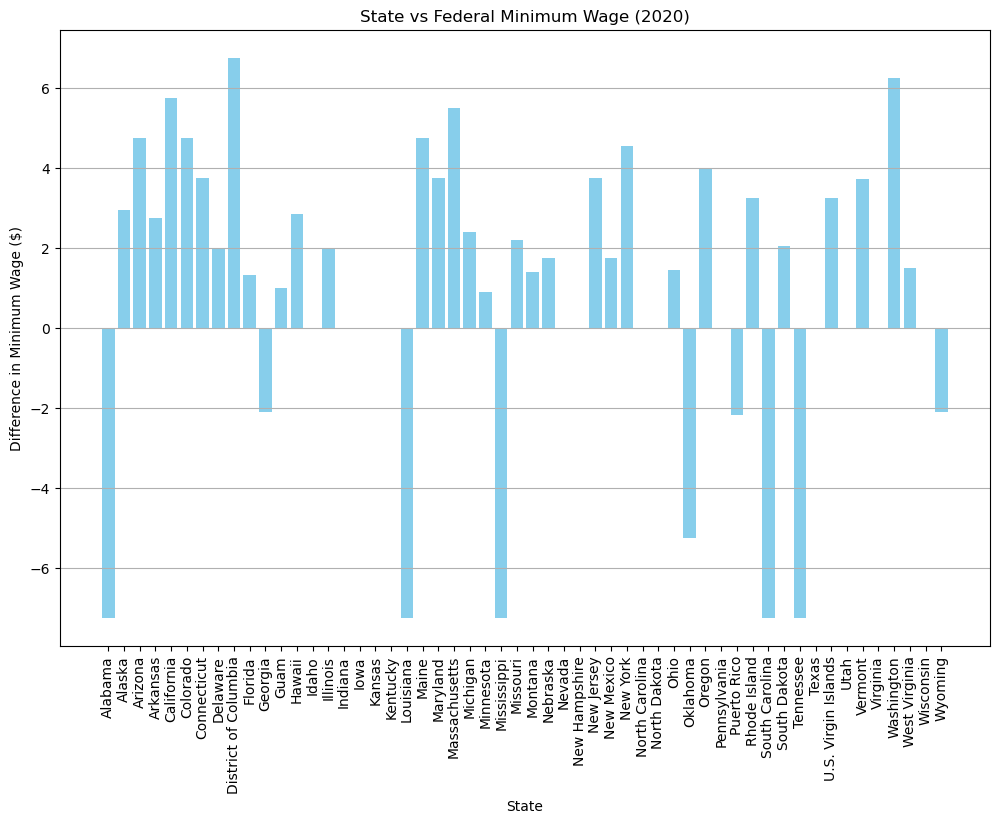

In [21]:
plt.figure(figsize=(12,8))
plt.bar(df_2020['State'], df_2020['Difference_2020'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Difference in Minimum Wage ($)')
plt.xticks(rotation = 90)
plt.title('State vs Federal Minimum Wage (2020)')
plt.grid(axis='y')
plt.show()


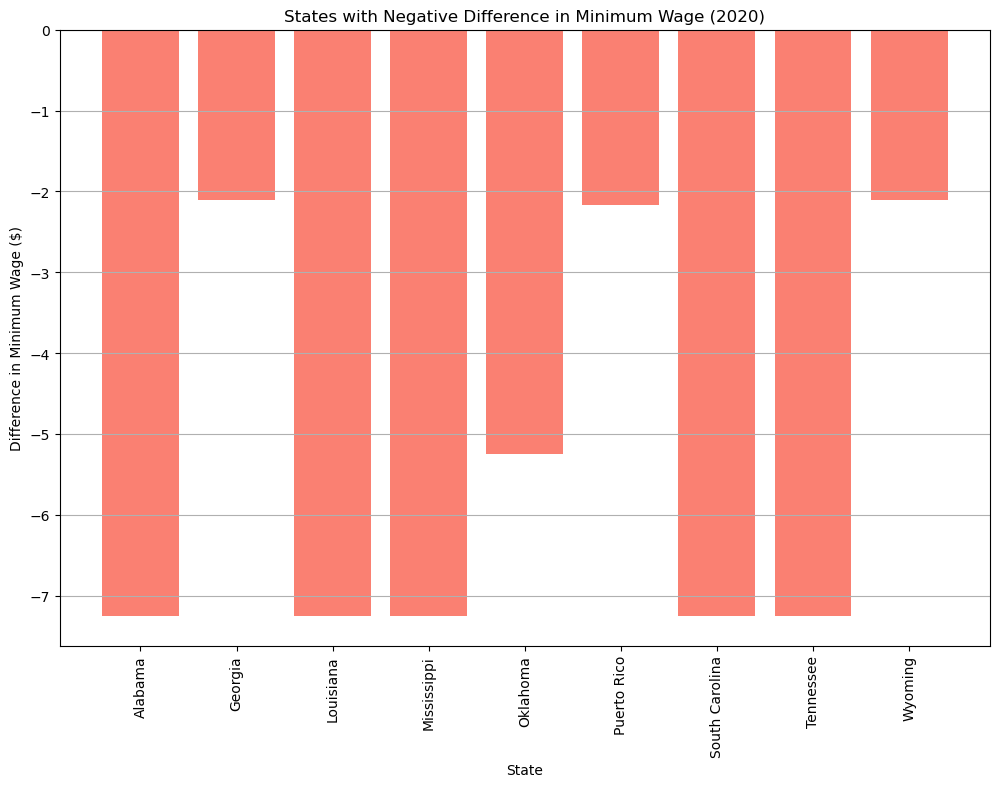

In [13]:
plt.figure(figsize=(12, 8))
plt.bar(negative_diff_df['State'], negative_diff_df['Difference_2020'], color='salmon')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Difference in Minimum Wage ($)')
plt.title('States with Negative Difference in Minimum Wage (2020)')
plt.grid(axis='y')
plt.show()

In [ ]:
# Plotting a map to plot regionality and show differences in minimum wage per state
# 19-- vs 2020

